In [36]:
import numpy as np
import matplotlib.pyplot as plt

try:
    from IPython.html.widgets import  interactive, IntSlider, widget, FloatText, FloatSlider, Checkbox, ToggleButtons
    pass
except Exception, e:    
    from ipywidgets import interactive, IntSlider, widget, FloatText, FloatSlider, Checkbox, ToggleButtons

%matplotlib inline

In [45]:
phi_v = lambda z: (4.*z) / (4.*z**2 + 1.)**(3./2.)
phi_h = lambda z: 2 - (4.*z) / (4.*z**2 + 1.)**(1./2.) 

R_v = lambda z: 1./(4.*z**2. + 1.)**(1./2.)
R_h = lambda z: (4.*z**2 + 1.)**(1./2.) - 2.*z
sigma_av = lambda h, sig0,sig1: sig0*(1.-R_v(h)) + sig1*R_v(h)
sigma_ah = lambda h, sig0,sig1: sig0*(1.-R_h(h)) + sig1*R_h(h)

In [46]:
sigmin = 0.1
sigmax = 2.

h = 1.

zmax = 4. 

z = np.linspace(0.,zmax,1000)

In [79]:
def plot_ResponseFct(h,sig0,sig1,orientation='vertical'):
    
    sigvec = sig0*np.ones(z.shape)
    sigvec[z > h] = sig1

    if orientation is 'vertical':
        phi = phi_v(z)
        sig_a = sigma_av(h,sig0,sig1)
        phi_title = '$\phi_V$'
    elif orientation is 'horizontal':
        phi = phi_h(z)
        sig_a = sigma_ah(h,sig0,sig1)
        phi_title = '$\phi_H$'

    phisig = phi*sigvec
    

    fig, ax = plt.subplots(1,3,figsize=(10,5))

    fs = 12

    ax[0].plot(sigvec,z,'r')
    ax[0].set_xlim([0.,sigmax*1.1])
    ax[0].invert_yaxis()
    ax[0].set_ylabel('z (m)',fontsize = fs)
    ax[0].set_title('$\sigma$', fontsize = fs+4, position=[.5, 1.02])
    ax[0].set_xlabel('Conductivity (S/m)', fontsize=fs)
    ax[0].grid(which='both',linewidth=0.4,color=[0.6,0.6,0.6])

    ax[1].plot(phi,z)
#     ax[1].set_xlim([0.,1.])
    ax[1].invert_yaxis()
    ax[1].set_title('%s'%(phi_title), fontsize = fs+4, position=[.5, 1.02])
    ax[1].set_xlabel('Response Function', fontsize=fs)
    ax[1].grid(which='both',linewidth=0.4,color=[0.6,0.6,0.6])

    ax[2].plot(phisig,z,color='k')
    ax[2].fill_betweenx(z,phisig,color='k',alpha=0.5)
    ax[2].invert_yaxis()
    ax[2].set_title('$\sigma \cdot$ %s'%(phi_title), fontsize = fs+4, position=[.5, 1.02])
    ax[2].set_xlabel('Weighted Conductivity (S/m)', fontsize=fs)
    ax[2].set_xlim([0.,phi.max()*sigmax])
    ax[2].grid(which='both',linewidth=0.4,color=[0.6,0.6,0.6])

    props = dict(boxstyle='round', facecolor='grey', alpha=0.2)

    # place a text box in upper left in axes coords
    textstr = '$\sigma_a=%.2f$ S/m'%(sig_a)
    ax[2].text(0.5*phi.max()*sigmax, 3.75, textstr, fontsize=fs+2,
            verticalalignment='bottom', bbox=props)

    plt.tight_layout()
    plt.show()
    
    return None


In [80]:
app = interactive(plot_ResponseFct,h = FloatSlider(min=0., max=zmax,value=1.0, step = 0.1),
                  sig0 = FloatSlider(min=sigmin,max = sigmax,value=(sigmin+sigmax)/4., step = 0.1),
                  sig1 = FloatSlider(min=sigmin,max = sigmax,value=(sigmin+sigmax)/2., step = 0.1),
                  orientation=ToggleButtons(options=['vertical','horizontal']))

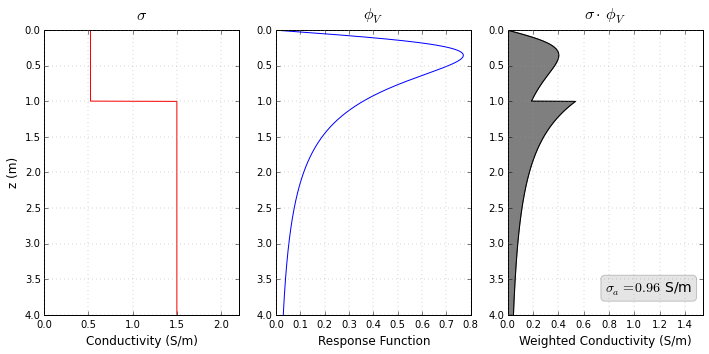

None

In [81]:
app